In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf
from empiricaldist import Cdf

In [2]:
data=pd.read_csv("election.csv")

## Sort the data and clean it from the wrong data

#### data=data.drop([3673],axis=0)
data=data.drop([519],axis=0)
data

In [3]:
data.describe()

,year,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,pct_winner,margin_winner_over_runnerup
count,9461.000000,9.461000e+03,9.461000e+03,9461.000000,9.461000e+03,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000
mean,2007.999577,1.934384e+04,2.056118e+04,549.253356,4.047413e+04,56.767459,37.481014,-0.609479,61.065685,27.881161
std,3.266073,4.547357e+04,7.204556e+04,1834.700359,1.153066e+05,146.879361,146.599026,145.396975,146.597607,18.883382
min,2004.000000,-9.999000e+03,-9.999000e+03,-9999.000000,-9.999000e+03,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000
25%,2004.000000,2.928000e+03,1.730000e+03,55.000000,4.955000e+03,50.150000,29.730000,0.800000,55.310000,12.200000
50%,2008.000000,6.333000e+03,4.165000e+03,143.000000,1.073800e+04,59.660000,38.800000,1.390000,61.800000,25.160000
75%,2012.000000,1.593700e+04,1.131200e+04,401.000000,2.779800e+04,68.710000,48.300000,2.000000,69.780000,41.000000
max,2012.000000,1.076225e+06,2.295853e+06,78831.000000,3.318248e+06,96.150000,93.390000,34.760000,96.150000,92.850000


## -------------------------------------------------------------------------------------------------------------------------
## Divide years in data frame each year alone

In [4]:
data_2004 = data[data.year==2004]
data_2008 = data[data.year==2008]
data_2012 = data[data.year==2012]

## Take a margin less than or equal 10 for each year

In [5]:
data_margin_2004=data_2004[data_2004.margin_winner_over_runnerup<=10]
data_margin_2004

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
2,2004,AL,Barbour County,01005,5899,4832,46,10777,54.7,44.8,0.4,rep,dem,54.7,9.9
11,2004,AL,Choctaw County,01023,3897,3303,27,7227,53.9,45.7,0.4,rep,dem,53.9,8.2
17,2004,AL,Conecuh County,01035,3271,2719,31,6021,54.3,45.2,0.5,rep,dem,54.3,9.1
36,2004,AL,Jefferson County,01073,158680,132286,2001,292967,54.2,45.2,0.7,rep,dem,54.2,9.0
45,2004,AL,Marengo County,01091,5255,5037,30,10322,50.9,48.8,0.3,rep,dem,50.9,2.1
50,2004,AL,Montgomery County,01101,44097,45160,393,89650,49.2,50.4,0.4,dem,rep,50.4,1.2
56,2004,AL,Russell County,01113,8337,8375,97,16809,49.6,49.8,0.6,dem,rep,49.8,0.2
76,2004,AZ,Navajo County,04017,17277,14815,251,32343,53.4,45.8,0.8,rep,dem,53.4,7.6
77,2004,AZ,Pima County,04019,171277,193128,2670,367075,46.7,52.6,0.7,dem,rep,52.6,5.9
82,2004,AR,Arkansas County,05001,3789,3110,47,6946,54.5,44.8,0.7,rep,dem,54.5,9.7


## count the value for all state in each year for the winner (rep,dem)

In [6]:
data_2004_repm = data_margin_2004[data_margin_2004.winner=='rep']
data_2004_repm=data_2004_repm['state'].value_counts()
data_2004_repm

WI    27
IA    23
MI    23
MN    21
IL    20
NC    18
VA    17
AR    16
MO    14
NY    12
OH    12
KY    12
PA    11
WV    11
GA    10
AK     9
TN     8
FL     8
CO     8
LA     8
TX     8
WA     7
SC     7
IN     6
OK     6
CA     6
AL     5
MS     5
SD     5
OR     4
ND     4
NH     3
NJ     3
NM     3
KS     2
ME     2
MD     2
UT     2
MT     2
NV     1
ID     1
CT     1
AZ     1
NE     1
Name: state, dtype: int64

In [7]:
data_2004_demm = data_margin_2004[data_margin_2004.winner=='dem']
data_2004_demm=data_2004_demm['state'].value_counts()
data_2004_demm

IA    21
VA    16
WI    16
MN    16
GA    12
IL    11
NY    10
AR    10
MI    10
NC     9
TN     9
PA     9
ME     9
OH     8
CO     8
WA     8
KY     7
MS     7
CA     7
WV     6
FL     5
SC     5
LA     5
NJ     5
NM     5
VT     4
MD     3
NH     3
TX     3
IN     3
MT     2
OR     2
CT     2
MO     2
AL     2
SD     2
HI     2
ND     2
NV     1
WY     1
MA     1
AZ     1
NE     1
Name: state, dtype: int64

### -----------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
data_margin_2008=data_2008[data_2008.margin_winner_over_runnerup<=10]
data_margin_2008

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
3156,2008,AL,Barbour County,01005,5866,5697,67,11630,50.40,49.00,0.60,rep,dem,50.40,1.40
3162,2008,AL,Chambers County,01017,8067,6799,90,14956,53.90,45.50,0.60,rep,dem,53.90,8.40
3165,2008,AL,Choctaw County,01023,4223,3636,35,7894,53.50,46.10,0.40,rep,dem,53.50,7.40
3171,2008,AL,Conecuh County,01035,3470,3429,44,6943,50.00,49.40,0.60,rep,dem,50.00,0.60
3190,2008,AL,Jefferson County,01073,149921,166121,2482,318524,47.10,52.20,0.80,dem,rep,52.20,5.10
3199,2008,AL,Marengo County,01091,5516,5926,29,11471,48.10,51.70,0.30,dem,rep,51.70,3.60
3202,2008,AL,Mobile County,01097,98049,82181,1194,181424,54.00,45.30,0.70,rep,dem,54.00,8.70
3207,2008,AL,Pickens County,01107,5434,4594,39,10067,54.00,45.60,0.40,rep,dem,54.00,8.40
3210,2008,AL,Russell County,01113,8705,10085,125,18915,46.00,53.30,0.70,dem,rep,53.30,7.30
3231,2008,AZ,Pima County,04019,182406,206254,4768,393428,46.40,52.40,1.20,dem,rep,52.40,6.00


In [9]:
data_2008_repm= data_margin_2008[data_margin_2008.winner=='rep']
data_2008_repm=data_2008_repm['state'].value_counts()
data_2008_repm

IA    31
MI    28
VA    27
MN    24
IN    23
IL    20
NC    20
OH    20
NY    17
KY    13
PA    13
SD    12
GA    11
MO    10
FL    10
TX     9
WI     8
TN     8
ND     8
MD     7
WV     7
MS     6
AK     6
AL     6
KS     5
LA     5
CO     5
OR     5
AR     4
SC     4
CA     3
WA     3
ID     3
NJ     3
MT     3
NV     2
UT     2
NE     2
DE     1
ME     1
NM     1
Name: state, dtype: int64

In [10]:
data_2008_demm = data_margin_2008[data_margin_2008.winner=='dem']
data_2008_demm=data_2008_demm['state'].value_counts()
data_2008_demm

MI    31
IA    25
IL    24
WI    23
MN    21
NY    19
GA    13
NC    12
OH    12
VA    10
WA     9
CA     9
TX     8
PA     8
MS     7
ND     7
SD     6
CO     6
KY     6
SC     6
WV     6
FL     6
IN     5
AK     5
MT     5
NH     4
MO     4
NM     4
NE     4
ME     4
OR     4
AL     3
LA     3
NJ     3
TN     3
UT     2
ID     2
NV     1
MA     1
AR     1
AZ     1
DE     1
CT     1
HI     1
MD     1
WY     1
KS     1
Name: state, dtype: int64

### -----------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
data_margin_2012=data_2012[data_2012.margin_winner_over_runnerup<=10]
data_margin_2012

,year,state,county,fips,vote_rep,vote_dem,vote_oth,vote_total,pct_rep,pct_dem,pct_oth,winner,runnerup,pct_winner,margin_winner_over_runnerup
6310,2012,AL,Barbour,01005,5550,5912,55,11517,48.19,51.33,0.48,dem,rep,51.33,3.14
6314,2012,AL,Butler,01013,5087,4374,41,9502,53.54,46.03,0.43,rep,dem,53.54,7.51
6316,2012,AL,Chambers,01017,7626,6871,132,14629,52.13,46.97,0.90,rep,dem,52.13,5.16
6319,2012,AL,Choctaw,01023,4152,3786,38,7976,52.06,47.47,0.48,rep,dem,52.06,4.59
6320,2012,AL,Clarke,01025,7470,6334,56,13860,53.90,45.70,0.40,rep,dem,53.90,8.20
6325,2012,AL,Conecuh,01035,3439,3555,31,7025,48.95,50.60,0.44,dem,rep,50.60,1.65
6344,2012,AL,Jefferson,01073,141683,159876,2964,304523,46.53,52.50,0.97,dem,rep,52.50,5.97
6353,2012,AL,Marengo,01091,5336,6167,40,11543,46.23,53.43,0.35,dem,rep,53.43,7.20
6356,2012,AL,Mobile,01097,94893,78760,1211,174864,54.27,45.04,0.69,rep,dem,54.27,9.23
6357,2012,AL,Monroe,01099,5741,4914,62,10717,53.57,45.85,0.58,rep,dem,53.57,7.72


In [12]:
data_2012_repm= data_margin_2012[data_margin_2012.winner=='rep']
data_2012_repm=data_2012_repm['state'].value_counts()
data_2012_repm

MI    29
MN    26
IA    25
WI    23
OH    19
IL    17
VA    17
NC    16
NY    13
GA    11
FL    10
LA     9
MS     8
AL     7
OR     7
PA     7
SD     7
MD     6
IN     6
WA     5
ND     5
TX     5
CA     5
CO     5
MT     4
AK     4
NE     4
SC     4
AR     4
NH     3
MO     3
TN     3
KY     3
UT     2
NJ     2
KS     2
WV     2
AZ     2
ME     1
NM     1
NV     1
MA     1
WY     1
ID     1
CT     1
Name: state, dtype: int64

In [13]:
data_2012_demm = data_margin_2012[data_margin_2012.winner=='dem']
data_2012_demm=data_2012_demm['state'].value_counts()
data_2012_demm

NY    17
MN    17
IA    16
IL    14
WI    13
MI    12
GA    11
NC    10
VA    10
CO     9
CA     9
MS     7
OH     7
PA     6
SC     6
WA     6
TX     5
NM     5
FL     5
ME     4
AL     4
IN     4
SD     3
OR     3
KY     3
AK     3
ND     2
LA     2
NJ     2
MA     2
TN     1
MT     1
AR     1
NV     1
DE     1
NH     1
MO     1
AZ     1
MD     1
ID     1
Name: state, dtype: int64

# --------------------------------------------------------------------------------------------------------------
## Select two state (MS , SC)that have changing winner between dem and rep and its margin less than or equal 10 over the years

#MS #SC 

In [14]:
data_2004_MS= data_margin_2004[data_margin_2004.state=='MS']
data_2008_MS= data_margin_2008[data_margin_2008.state=='MS']
data_2012_MS= data_margin_2012[data_margin_2012.state=='MS']

data_2004_SC= data_margin_2004[data_margin_2004.state=='SC']
data_2008_SC= data_margin_2008[data_margin_2008.state=='SC']
data_2012_SC= data_margin_2012[data_margin_2012.state=='SC']

dMS = data_2004_MS.append(data_2008_MS)
dMS = dMS.append(data_2012_MS)

dSC = data_2004_SC.append(data_2008_SC)
dSC = dSC.append(data_2012_SC)


## ---------------------------------------------------------------------------------------------------------------------------
## This graph show that MS's voting rate ranged from 40-60% over 3 years and its win was changing

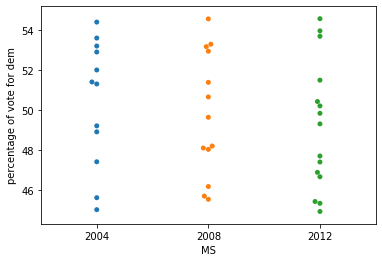

In [15]:
_= sns.swarmplot(x='year',y='pct_dem', data=dMS)
_=plt.xlabel('MS')
_=plt.ylabel('percentage of vote for dem')
plt.show()


## ---------------------------------------------------------------------------------------------------------------------------
## This graph show that SC's voting rate ranged from 40-54% over 3 years and its win was changing

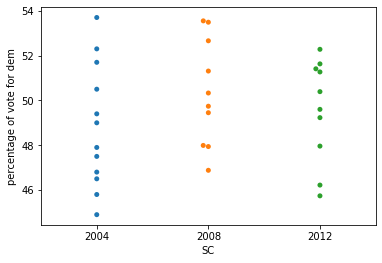

In [16]:
_= sns.swarmplot(x='year',y='pct_dem', data=dSC)
_=plt.xlabel('SC')
_=plt.ylabel('percentage of vote for dem')
plt.show()


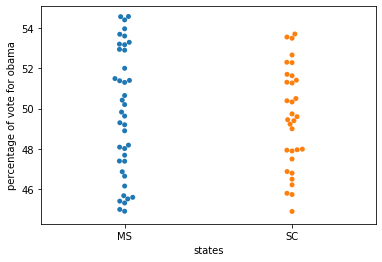

In [17]:
df = data_2004_MS.append(data_2008_MS)
df = df.append(data_2012_MS)
df = df.append(data_2004_SC)
df = df.append(data_2008_SC)
df = df.append(data_2012_SC)

_= sns.swarmplot(x='state',y='pct_dem', data=df)
_=plt.xlabel('states')
_=plt.ylabel('percentage of vote for obama')
plt.show()



# --------------------------------------------------------------------------------------------------------

## The state has the largest percentage for dem is (Jasper county) that has the largest votes in MS state approximatly 57%

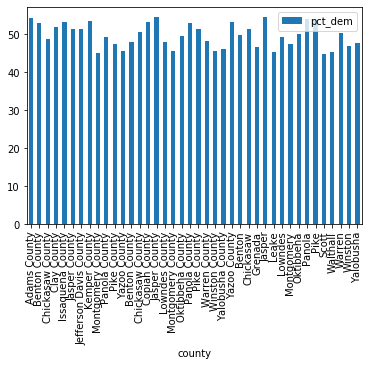

In [18]:
dMS.plot.bar(x='county',y='pct_dem')

## ------------------------------------------------------------------------------------------------------------------------
## The state has the largest percentage for dem is (Clarendon county) that has the largest votes in SC state approximatly 55%

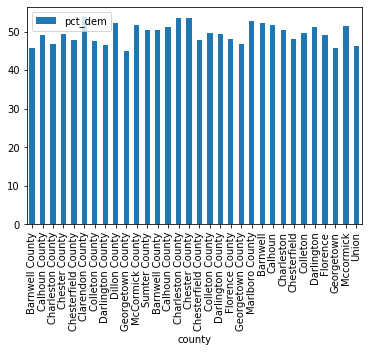

In [19]:
dSC.plot.bar(x='county',y='pct_dem')

## ------------------------------------------------------------------------------------------------------------------------
## The state has the lowest margin is (Oktibbeha, Benton county) that has the lowest margin in MS state approximatly (0, 0.5)

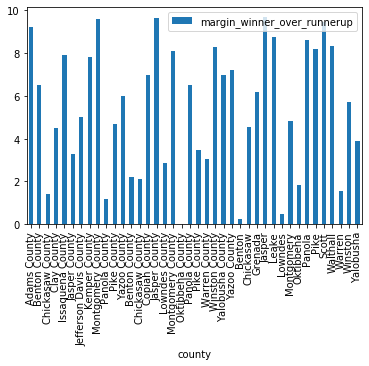

In [20]:
dMS.plot.bar(x='county',y='margin_winner_over_runnerup')

## ------------------------------------------------------------------------------------------------------------------------
## The state has the lowest margin is (Chester, Darlington county) that has the lowest margin in SC state approximatly (0, 0.3)

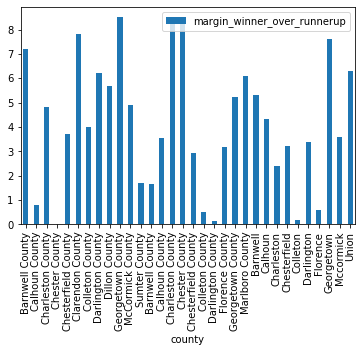

In [21]:
dSC.plot.bar(x='county',y='margin_winner_over_runnerup')

# --------------------------------------------Summary----------------------------------------------------

## In MS state:-
### *If he wants the county where the most votes for dem chooses the Jasper county.
### *If he wants the county where the least Margin choose the (Oktibbeha, Benton county).

## In SC state:-
### *If he wants the county where the most votes for dem chooses the Clarendon county.
### *If he wants the county where the least Margin choose the (Chester, Darlington county).